In [1]:
!pip install findspark

In [1]:
import findspark
findspark.init()
import pyspark
import sparkmonitor
!jupyter nbextension install sparkmonitor --py --user --symlink 
!jupyter nbextension enable sparkmonitor --py --user            
!jupyter serverextension enable --py --user sparkmonitor
!ipython profile create && echo "c.InteractiveShellApp.extensions.append('sparkmonitor.kernelextension')" >>  $(ipython profile locate default)/ipython_kernel_config.py

Installing D:\Anaconda\lib\site-packages\sparkmonitor\static -> sparkmonitor
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable sparkmonitor --user --py
    
Enabling notebook extension sparkmonitor/module...
      - Validating: ok
Enabling: sparkmonitor.serverextension
- Writing config: C:\Users\aserg\.jupyter
    - Validating...
      sparkmonitor.serverextension  ok


In [3]:
print(conf.toDebugString())

NameError: name 'conf' is not defined

In [2]:
import random
sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000
def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1
count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
sc.stop()

3.14130912


In [3]:
dict = { 
    'name':['a','b','c','d', 'e', 'f','g'],
    'age':[13, 14, 15, 16, 17,18,19],
    'designation':['aaaaa','bbbbb','ccccc','ddddd', 'eeeee', 'fffff','ggggg']
}
import pandas as pd
import numpy as np
arr = np.array([10, 20,30,40,50,60,70])
df = pd.DataFrame(dict, index = arr)
df

,name,age,designation
10,a,13,aaaaa
20,b,14,bbbbb
30,c,15,ccccc
40,d,16,ddddd
50,e,17,eeeee
60,f,18,fffff
70,g,19,ggggg


In [4]:
df.dtypes

name           object
age             int64
designation    object
dtype: object

In [5]:
df.head()

,name,age,designation
10,a,13,aaaaa
20,b,14,bbbbb
30,c,15,ccccc
40,d,16,ddddd
50,e,17,eeeee


In [6]:
df.tail()

,name,age,designation
30,c,15,ccccc
40,d,16,ddddd
50,e,17,eeeee
60,f,18,fffff
70,g,19,ggggg


In [7]:
df.index

Int64Index([10, 20, 30, 40, 50, 60, 70], dtype='int64')

In [8]:
df.set_index('name')

,age,designation
name,,
a,13,aaaaa
b,14,bbbbb
c,15,ccccc
d,16,ddddd
e,17,eeeee
f,18,fffff
g,19,ggggg


In [9]:
df['age'] = df['age']*10

In [13]:
df['age'] = df['age'].map(lambda X:10*X)

In [14]:
df

,name,age,designation
10,a,1300,aaaaa
20,b,1400,bbbbb
30,c,1500,ccccc
40,d,1600,ddddd
50,e,1700,eeeee
60,f,1800,fffff
70,g,1900,ggggg


In [15]:
series_age = df.age

In [19]:
for row_index in series_age.keys():
    print(row_index)

10
20
30
40
50
60
70


In [21]:
df.isna().sum()

name           0
age            0
designation    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 10 to 70
Data columns (total 3 columns):
name           7 non-null object
age            7 non-null int64
designation    7 non-null object
dtypes: int64(1), object(2)
memory usage: 544.0+ bytes


In [23]:
df.name.unique

<bound method Series.unique of 10    a
20    b
30    c
40    d
50    e
60    f
70    g
Name: name, dtype: object>

In [25]:
#if index is datetime
w=df.resample('M')['age'].count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

<IPython.core.display.Javascript object>


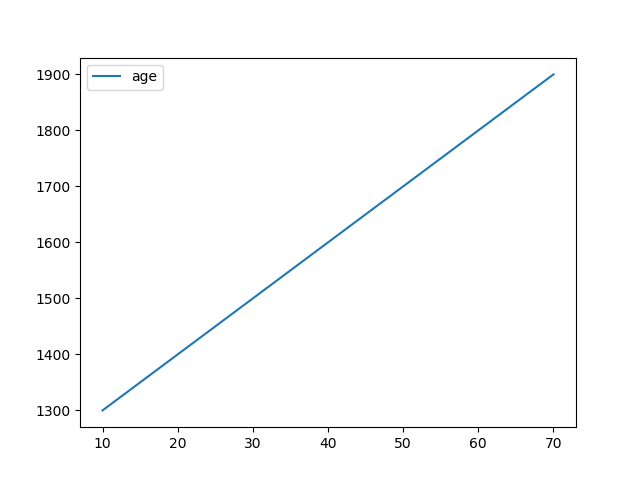

In [27]:
%matplotlib notebook
df.plot()